In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

## Univariate analysis


In [16]:
df_setosa=df.loc[df['species']=='setosa']
df_virginica=df.loc[df['species']=='virginica']
df_versicolor=df.loc[df['species']=='versicolor']

plotting the graph (with different hues)

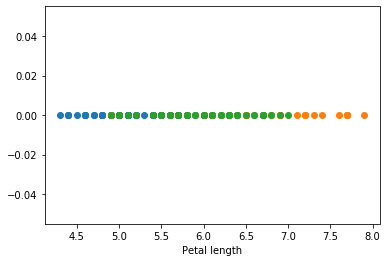

In [17]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o')
plt.xlabel('Petal length')
plt.show()

## Bivariate analysis
1 comparison of two variables for example check the dependence of petal width and sepal width for every specie of the flower we are studying

2 here we will be building a hue map with sepal length and sepal width combined with the hue features of all the variables

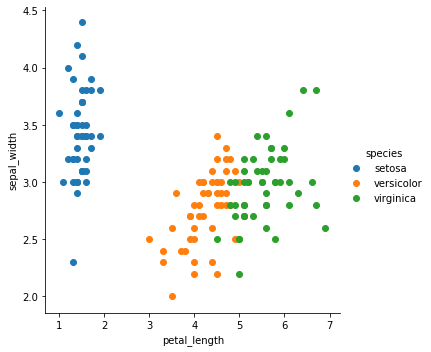

In [19]:
sns.FacetGrid(df,hue="species",height=5).map(plt.scatter,"petal_length","sepal_width").add_legend();
plt.show()

In [20]:
#shows the comparison of each sepal width and petal length for all the types of species available there 

## Multivariate analysis

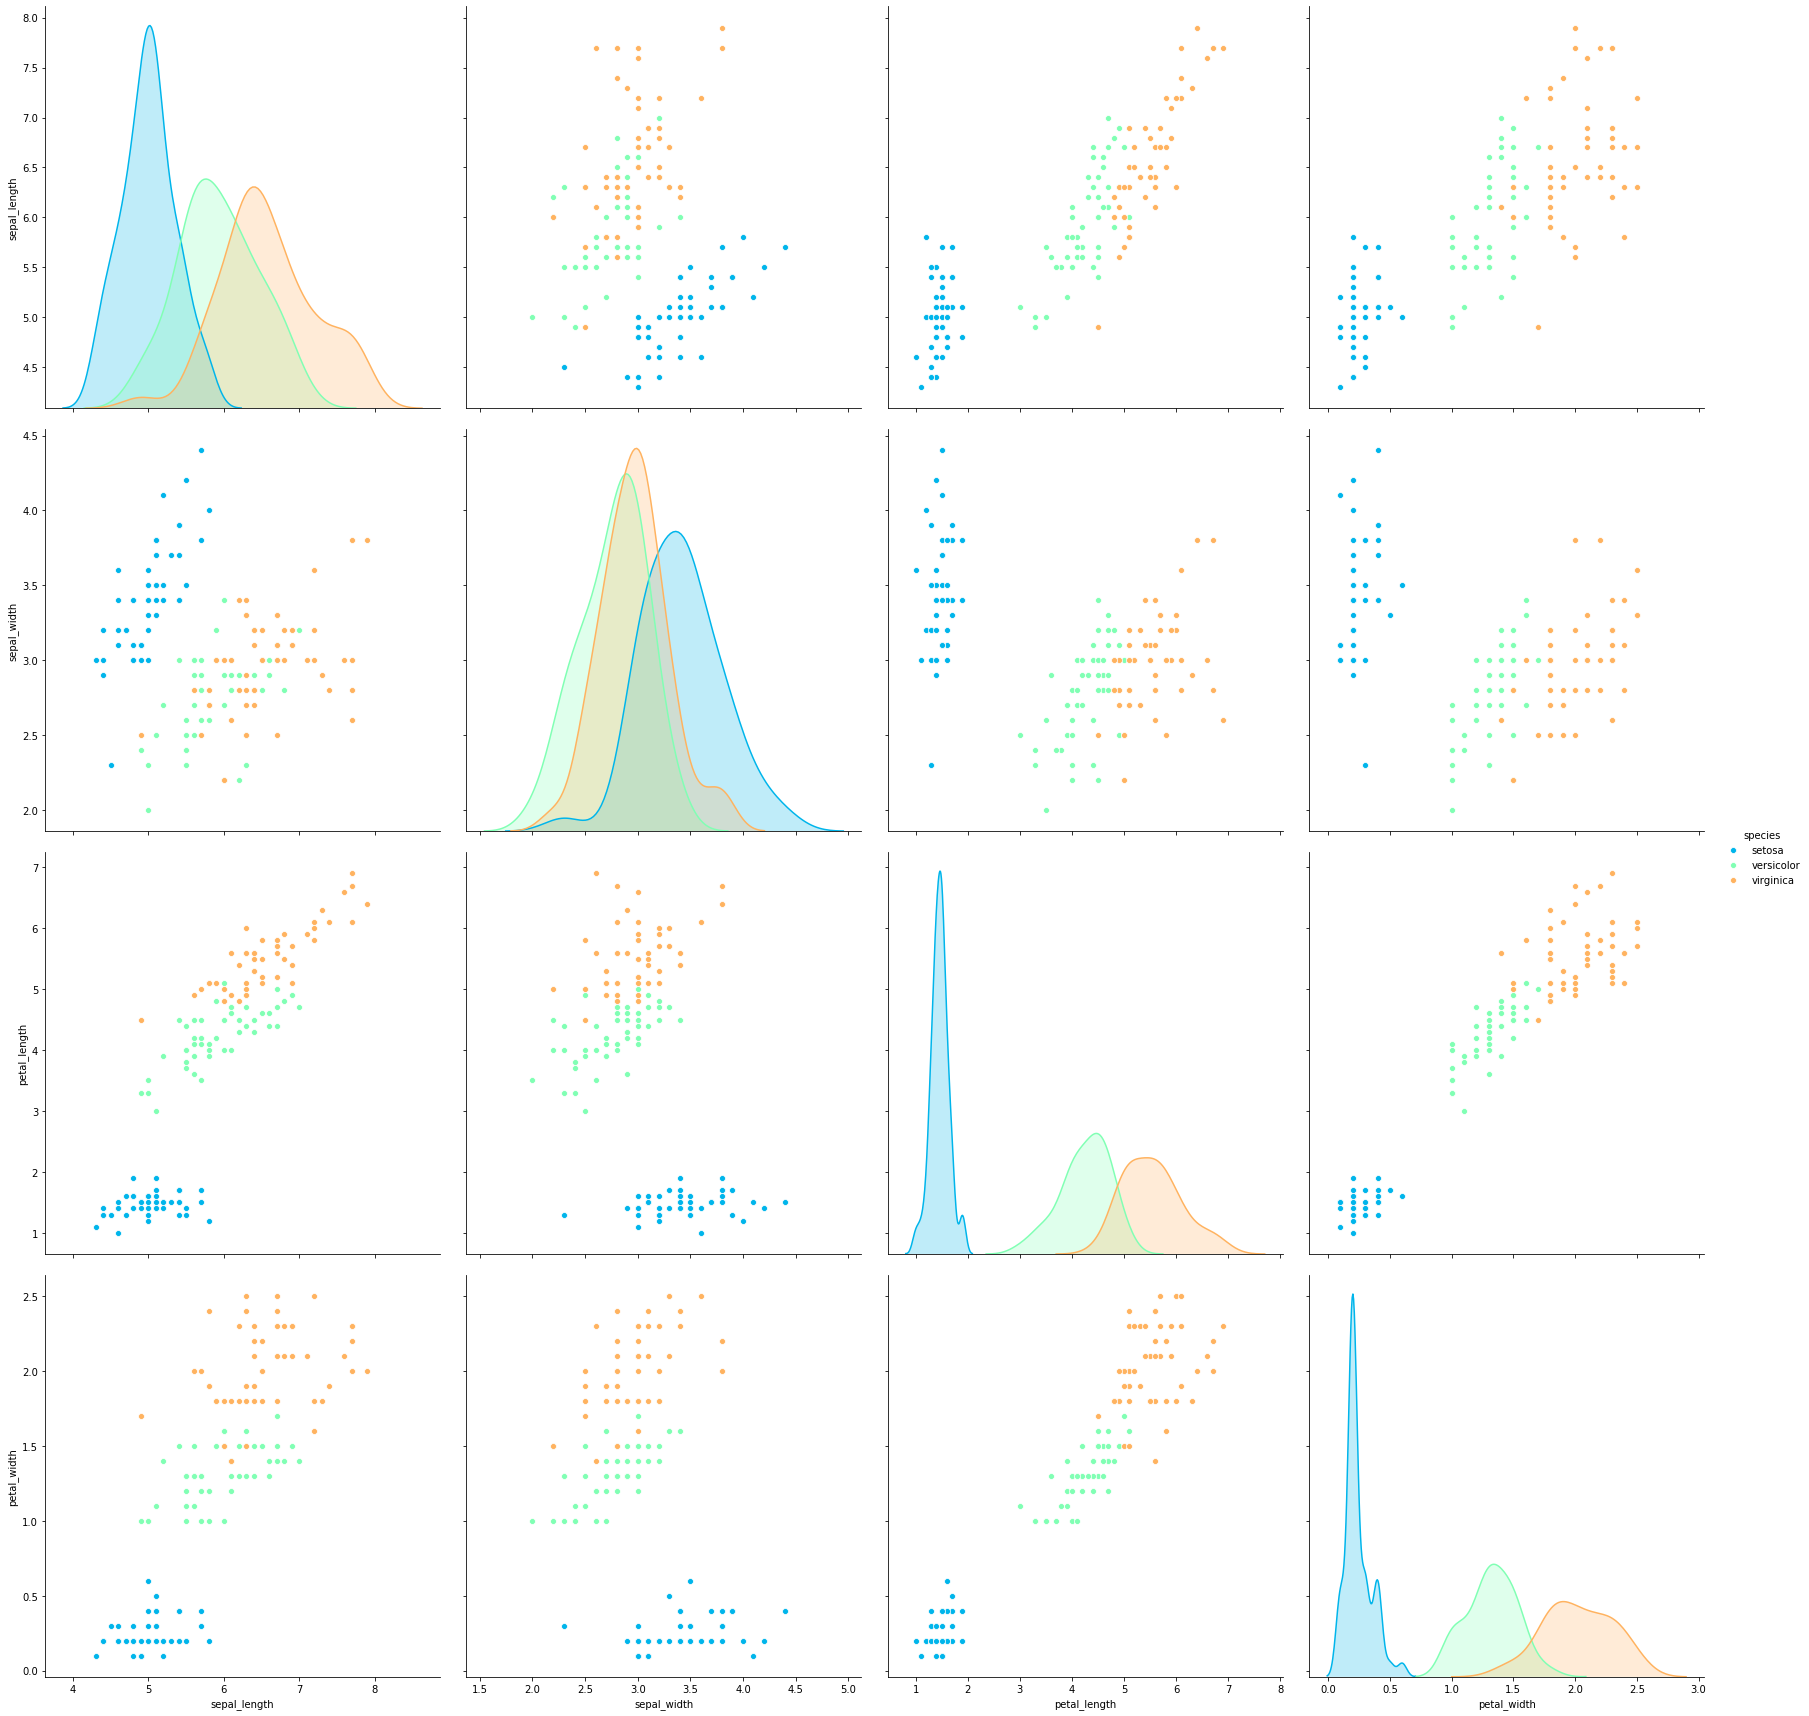

In [25]:
sns.pairplot(df,hue="species",height=6, palette="rainbow")


## Multiple linear regression

In [86]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('marketing.csv')
dataset=pd.DataFrame(df)
dataset
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]
print(dataset)

#Convert the column into categorical columns
# doing one hot encoding



    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [87]:
states=pd.get_dummies(X['State'],drop_first=True)

# Drop the state coulmn
X=X.drop('State',axis=1)
print(X)
# concat the dummy variables
# with the new table created
X=pd.concat([X,states],axis=1)
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [88]:

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [89]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [90]:
print(score*100," %") 

93.47068473282422  %


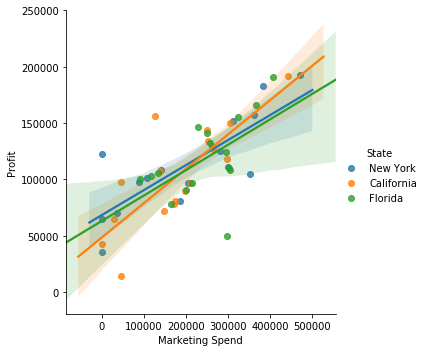

In [123]:
sns.lmplot(x='Marketing Spend',y='Profit', data=dataset, hue="State")

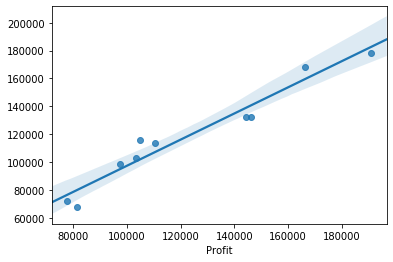

In [118]:
sns.regplot(y_test ,y_pred)